[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/emiletimothy/Caltech-CS155-2023/blob/main/set5/set5_prob2.ipynb)


# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # download the dataset
# !wget -O train.txt https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/train.txt
# !wget -O test.txt https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/test.txt

## 2C:
Fill in these functions to train your SVD

## 2D:
Run the cell below to get your graphs

In [3]:
from numpy.random.mtrand import gamma
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    sum = Vj*(Yij - np.dot(Ui, Vj))
    grad = reg*Ui-sum
    return eta*grad

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    sum = Ui*(Yij - np.dot(Ui, Vj))
    grad = reg*Vj-sum
    return eta*grad

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    sum = 0
    for trip in Y:
      i = trip[0]-1
      j = trip[1]-1
      Yij = trip[2]
      sum += (Yij-np.dot(U[i], V[j]))**2
      
    return float(sum/(2*len(Y)))



def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(low=-0.5, high=0.5, size=(M,K))
    V = np.random.uniform(low=-0.5, high=0.5, size=(N,K))
    e=0
    mse_0 = get_err(U, V, Y, reg)
    prev_mse = mse_0
    cur_mse = mse_0
    first_mse = 0
    first = True
    while e<max_epochs:
      np.random.shuffle(Y)
      for trip in Y:
        i = trip[0]-1
        j = trip[1]-1
        Yij = trip[2]
        U[i] -= grad_U(U[i], Yij, V[j], reg, eta)
        V[j] -= grad_V(V[j], Yij, U[i], reg, eta)

      cur_mse = get_err(U, V, Y, reg)
      if(first):
        first_mse = mse_0-cur_mse
        first = False
      
      if (prev_mse-cur_mse)<=(first_mse*eps):
        break

      prev_mse = cur_mse
      e += 1

    return U, V, cur_mse

Factorizing with  943  users,  1682  movies.


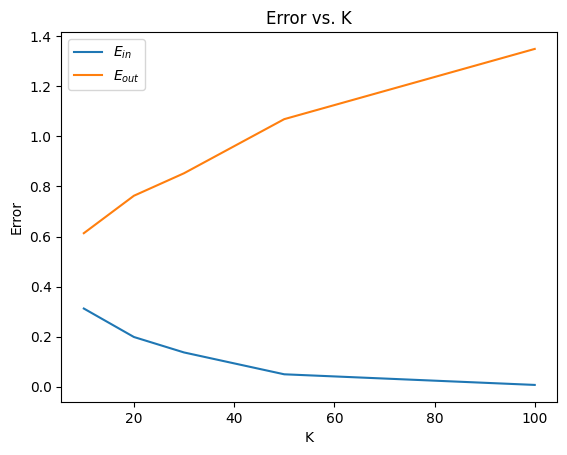

In [4]:
Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))

plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

## 2E:
Run the cell below to get your graphs. This might take a long time to run, but it should take less than 2 hours. I would encourage you to validate your 2C is correct.

In [5]:
Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein.png')	
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()	
plt.savefig('2e_eout.png')		


Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.0001


KeyboardInterrupt: 